In [14]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading dataset
df = pd.read_csv('D:\Datasets of AB\dataset\Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


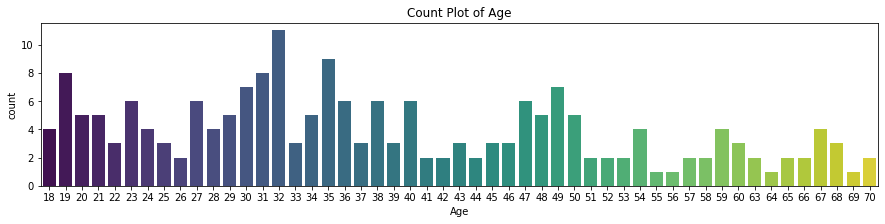

In [8]:
plt.rcParams['figure.figsize'] = (15, 3)
sns.countplot(df['Age'], palette = 'viridis')
plt.title('Count Plot of Age', fontsize = 12)
plt.show()

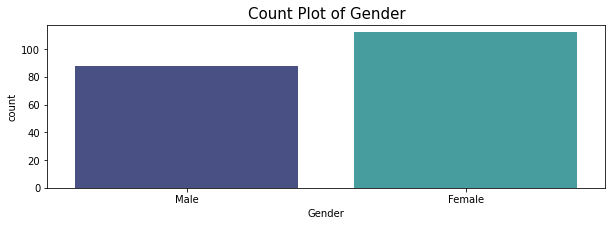

In [9]:
plt.rcParams['figure.figsize'] = (10, 3)
sns.countplot(df['Gender'], palette = 'mako')
plt.title('Count Plot of Gender', fontsize = 15)
plt.show()

In [10]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

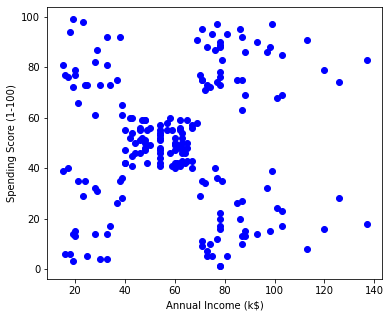

In [18]:
#Visualise data points
plt.figure(figsize=(6, 5))
plt.scatter(X["Annual Income (k$)"],X["Spending Score (1-100)"],c='blue')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

### Selection of Clusters

In [12]:
# wcss= within cluster sum of sqaures
# we need to calculate the wcss beucase we need the elbow curve
# to identify the no. of cluster requirement.
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

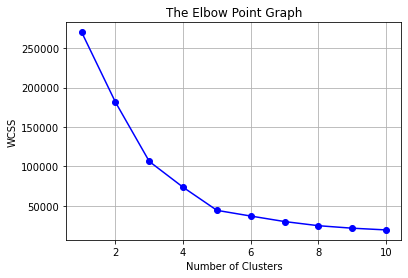

In [17]:
# draw elbow graph

fig=plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111, xlabel="Number of Clusters", ylabel="WCSS")
plt.plot(range(1,11), wcss, "bo-")
plt.title('The Elbow Point Graph')
plt.grid()
plt.show()

In [19]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25011.839349156588,
 21850.165282585633,
 19672.07284901432]

We can choose 5 for number of clusters.

In [20]:
# training the k means algo
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


In [21]:
print(np.unique(Y))
#no. of cluster

[0 1 2 3 4]


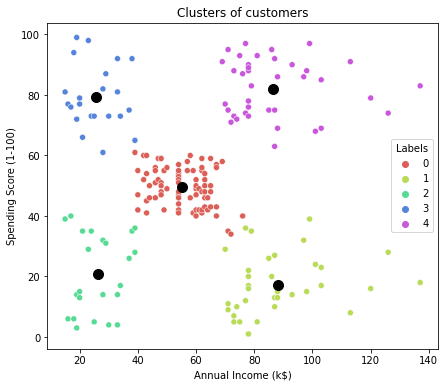

In [22]:
centroids = kmeans.cluster_centers_
X['Labels'] = kmeans.labels_

plt.figure(figsize=(7, 6))

sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 5))

plt.scatter(centroids[:,0], centroids[:,1], c='black',s=100)
plt.title('Clusters of customers')
plt.show()

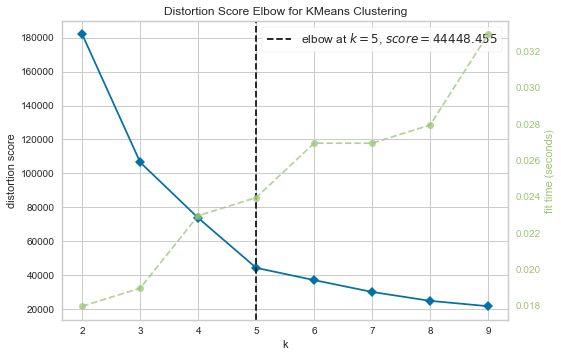

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X)
visu.poof()

Both yellowbrick and elbow method gives us number 5 as our optimal cluster number.

### [Silhouette Score](https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam)

In [24]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.29639579871487315
For n_clusters=3, the silhouette score is 0.4679388751095362
For n_clusters=4, the silhouette score is 0.4936334659959205
For n_clusters=5, the silhouette score is 0.5552538794032924
For n_clusters=6, the silhouette score is 0.5409726299554435
For n_clusters=7, the silhouette score is 0.527495796933352
For n_clusters=8, the silhouette score is 0.45862870832085323
For n_clusters=9, the silhouette score is 0.45678380897509724
For n_clusters=10, the silhouette score is 0.459620906658555


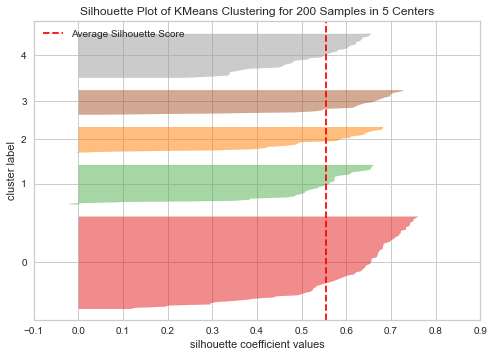

In [25]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();